In [96]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [97]:
class AgentState(TypedDict):
    draft: str
    feedback: str
    iterations: int
    

In [98]:
def writer_node(state: AgentState) -> AgentState:
    """This node writes draft and save it to the state"""
    print("Writing draft version", state["iterations"])
    if state.get("feedback") != None and state["feedback"] == "Too short":
        state["iterations"] += 1
        state["draft"] = state["draft"] + " more content."
    else:
        state["draft"] = "Draft saved"
        state["iterations"] += 1
    return state

def critic_node(state: AgentState) -> AgentState:
    """This node criticizes the draft and returns the feedback"""
    if len(state["draft"]) < 20:
        state["feedback"] = "Too short"
    else:
        state["feedback"] = "Perfect"
    return state

def router_node(state: AgentState) -> str:
    """This function routes the flow based on the feedback"""
    print("Router node", state["iterations"])
    
    if state["iterations"] > 5:
        return "END"

    if state["feedback"] == "Too short":
        return "writer_node"
    elif state["feedback"] == "Perfect":
        return "END"

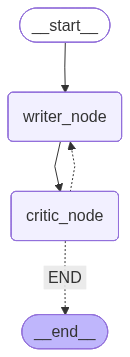

In [99]:
graph = StateGraph(AgentState)
graph.add_node("writer_node", writer_node)
graph.add_node("critic_node", critic_node)

graph.add_edge(START, "writer_node")
graph.add_edge("writer_node", "critic_node")

graph.add_conditional_edges(
    "critic_node",
    router_node,
    {
        "writer_node": "writer_node",
        "END": END
    }
)

app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [100]:
result =app.invoke({"draft":"Draft","iterations":1})
print('Final draft:', result['draft'])

Writing draft version 1
Router node 2
Writing draft version 2
Router node 3
Final draft: Draft saved more content.
